# Lecture1 数据类型与容器类

## 一、Python语言的特色与课程教学目标
1. 是一种**胶水（标签-认领）型**语言  
   能够支持、派生出丰富多样的周边软件包体系
2. 具有自己的独特的堪称典范的语言机制  
   **数据交换机制**  
   **软件融入机制**
3. 纯面向对象语言  
   “除了对象，没有其他”，c/cpp不是

## 二、Jupyter notebook简介
1. Jupyter notebook：一种混合了描述文本和代码实现的交互编程环境
2. 本质是“基于B/S架构的软件在线编程环境”（client-server）

## 三、Python的基本数据类型与表达式
#### 形式上基本继承了C语言的表达方案，但本质上是面向对象的。底层有比较复杂的实现规范。
### 1.整数
#### 底层是字符串实现（无论什么进制），和c/cpp不同

In [1]:
x = 99999999999999999999999
print(x)
print(type(x))
print(type(5), type(5.4))

99999999999999999999999
<class 'int'>
<class 'int'> <class 'float'>


In [132]:
i = 107
print(i == 107) # 整数字符串实现，上不封顶（由内存大小决定），实际的比较相等是通过类似2**63取模这样的hash操作实现

True


In [133]:
print(i is 107) # is用于判断两个标签是否指向同一对象

True


<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/wz/k8zp21d91q301dlw5467v5sm0000gn/T/ipykernel_14618/3514497295.py:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
  print(i is 107) # is用于判断这两个标签是否指向同一对象


### 2.浮点数
-   底层是cpp实现，符合IEEE-754标准   
-   int可以任意长度，由内存大小决定；float精确到15位十进制小数  

In [2]:
num1 = 101.1 # 64位浮点数编码
num2 = 100.000000000000001 # 会产生精度误差
print(num1 - num2)
num1 = 101.000000000000001
num2 = 100.0000000000000001 # 16位小数，会产生截断误差
print(num1 - num2)
num2 = 1e-200
print(num1 / num2)

1.0999999999999943
1.0
1.01e+202


### 3.算术表达式
#### python中没有变量类型的概念，变量只是对象的标签，无类型  
#### 对象有类型，变量被看作对对象的引用
https://docs.python.org/zh-cn//3/library/stdtypes.html#numeric-types-int-float-long-complex 

In [135]:
a = 2 + 10 # 变量名直接使用，解释性语言特色
print("a=", (a + 1) / 3)
b = 3**2 + 1.3
print("b=", b)

a= 4.333333333333333
b= 10.3


In [4]:
c = complex(1, 2)
c

(1+2j)

In [7]:
c.conjugate()

(1-2j)

In [9]:
divmod(5, 2)

(2, 1)

###  4.字符串常量
#### 一种容器，不可直接写的顺序类型对象
https://docs.python.org/3/library/stdtypes.html#string-methods 

In [10]:
'''
单引号/双引号表达字符串常量
连续三个单引号开启一段注释
'''
st1 = '"Hello"'
st2 = "Python!"
print(st1 + ' ' + st2)

"Hello" Python!


In [49]:
# st1[0] = '1'  # 'str' object does not support item assignment

In [14]:
str = 'Do U have a nice vacation?'
str += '\n' + "No, I don\'t." # 转义符
print(str)

Do U have a nice vacation?
No, I don't.


In [15]:
str1 = "人生苦短，我用Python！"
str1

'人生苦短，我用Python！'

In [20]:
str2 = '用了Python,'\
        '更觉人生苦短'
 # \后不能有多余空格
str2

'用了Python,更觉人生苦短'

In [21]:
str3 = '''
Python虽然好，可惜不牢靠。
模块各自乱升级，代码隔年跑不了。凭空添烦恼。
''' # 多行连续字符串，也可以用3个单引号括起来
str3

'\nPython虽然好，可惜不牢靠。\n模块各自乱升级，代码隔年跑不了。凭空添烦恼。\n'

In [141]:
print(str3)


Python虽然好，可惜不牢靠。
模块各自乱升级，代码隔年跑不了。凭空添烦恼。



In [142]:
s = "        11123123abc"
s = s.strip(' ') # str.strip([chars])去除前导符号
print(s)
print(s.strip('1')) # s并没有被真正改动，返回的是一个新对象
print(s)
print('s.find = ', s.find('23'))
i = s.find('23', 4) # 从特定下标开始定位串
print(i, s.count('11')) #count的实现是find的复用

11123123abc
23123abc
11123123abc
s.find =  3
6 1


### 5.布尔类型与布尔表达式

In [22]:
t, f = True, False # 布尔常量
print(type(t))

<class 'bool'>


In [25]:
print(t and f)
print(t or f)
print(not t)
print(t != f) #可以理解为xor

False
True
False
True


In [145]:
a = 0 #类型均可以自定义隐藏函数__bool__()返回的布尔值
print(not a)

True


#### 短路运算

In [146]:
s1 = '123'
s2 = s1 or 'abc' #or, and为短路运算，不强制返回布尔值（类似于C中的问号表达式）
print(s2)
s1 = ''
s2 = s1 or 'abc'
print(s2)

123
abc


### 6.对象
#### 唯一的标识码（id）
一个对象只有一个不可更改的标识码，可以用内建函数id()，返回int（id可以理解为该对象在**内存中的地址**）

In [26]:
a = 2.0 
b = 2.0
print(a is b)   # is比较标识码
print(a == b)   # ==比较值

False
True


#### Python的赋值与引用绑定
-   名字(id)是对一个对象的称呼，给对象取一个名字的操作叫作命名，python将赋值语句认为是一个**命名操作**（或者称为**名字绑定**）。  
-   而对于对象来说，每绑定一个名字，就在属性的引用计数上进行+1操作。每取消一个绑定就把引用计数-1.  
-   环境会自动检测对象的引用计数来进行**垃圾回收**。因此，python的对象**一般**不需要显式的进行释放操作。  
-   **实际情况比较复杂，环境并不单纯记录引用，存在一些相互依赖的变量，因此垃圾回收并不总是能够自动进行**

In [27]:
a = 2.0 
b = a
print(a is b)   # is比较标识码
print(a == b)   # ==比较值

True
True


### 7.条件表达式与分支语句
#### 运算符优先级
:=; lambda; if-else; or; and; not;  
in, not in, is, is not, <, <=, >, >=, !=, ==;  
|; ^; &; <<, >>;  
+, -; *, @, /, //, %;  
+x, -x, ~x;  
**

### 小结
-   Python语言基本继承了传统C的变量类型，表达式计算及流程方案。语言格式规范上有调整。
-   在此基础上理解、实现传统的编程方案基本没有太大困难。
-   效率会比较低。

## 四、Python的序列类型与顺序计算流程
#### 序列（顺序）类型：列表（List），元组（tuple），range()，字符串（str），字节流类型
### 常用方法
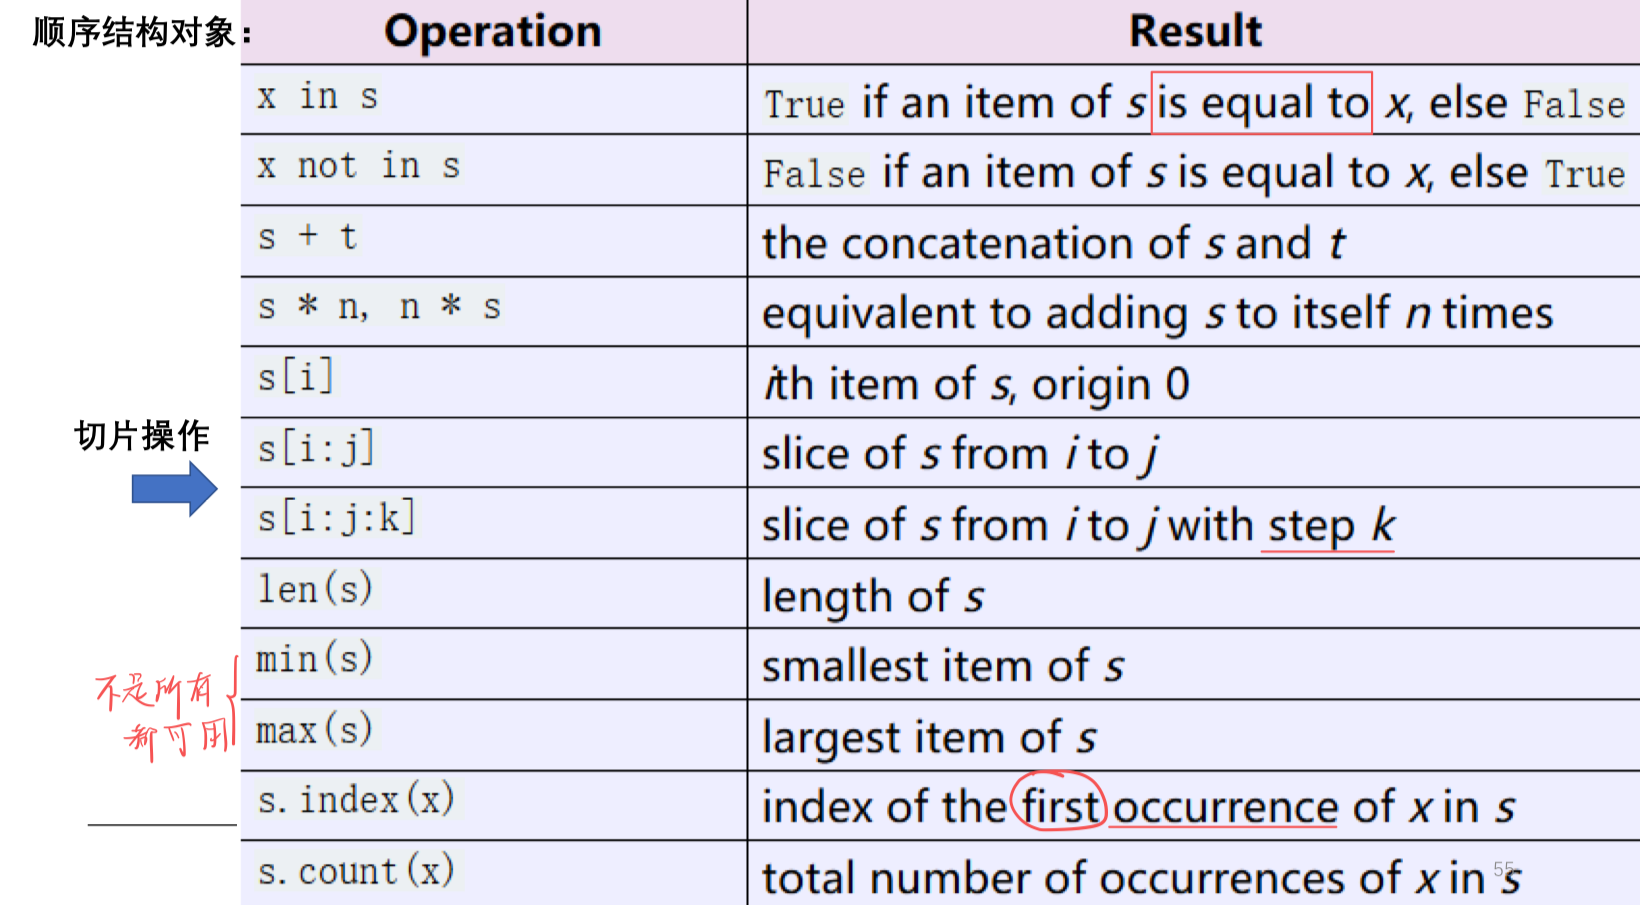
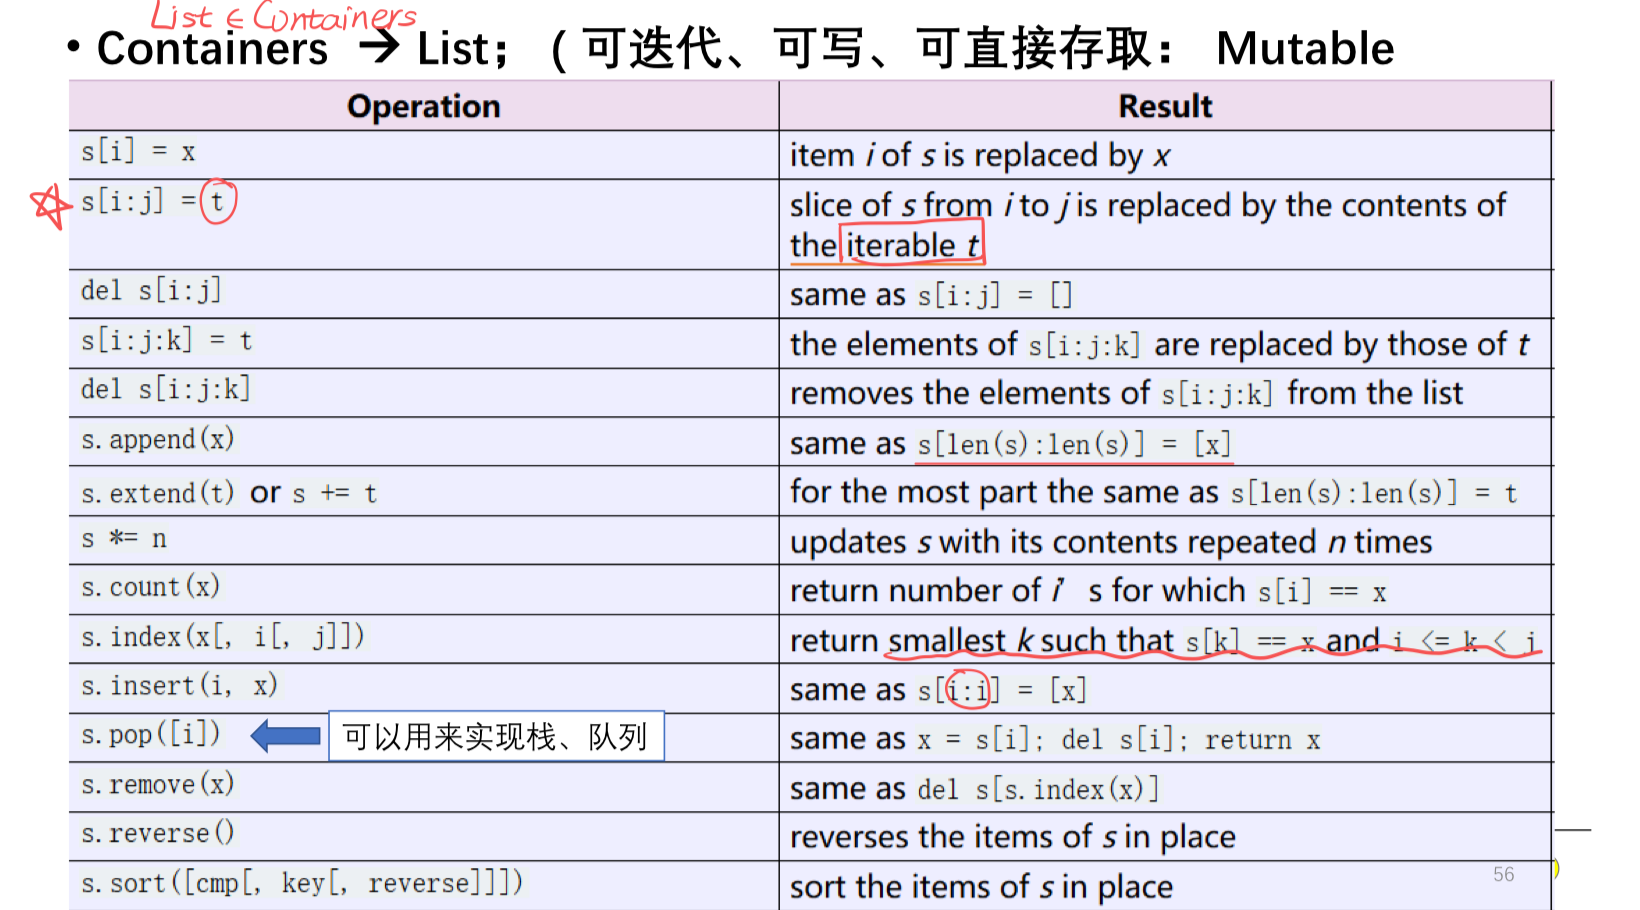
### 1.列表（List）
本质：**对象引用的序列**  
特点：**类型兼容性好、结构灵活、可容纳复合类型**  
方法：增删查改

In [32]:
a = [1, 2, 'aaa', 1.23] #不同类型可以混合，对象并不存放在List中，实质是引用列表
print('a = ',a)
print("a[1] = ", a[1], "; a[2] = ", a[2]) #对象内部内置了被print的方法，因此不需要%d,%s这样的C风格输出控制

a =  [1, 2, 'aaa', 1.23]
a[1] =  2 ; a[2] =  aaa


#### 列表元素的赋值：指向新的对象

In [33]:
b = a #添加一个新的引用b
print(b)

[1, 2, 'aaa', 1.23]


In [34]:
b[1] = 'bbb' #修改的是列表对象2号单元的引用，使该引用指向新的字符串对象‘bbb'
print(a)

[1, 'bbb', 'aaa', 1.23]


#### 添加元素append()

In [35]:
a = []
a.append(20.5)
a.append(30)
a.append('hello world!')
print(a)

[20.5, 30, 'hello world!']


#### （前）插入元素insert()

In [36]:
a.insert(2,'beautiful') #在a[2]前插入元素
print(a)
a.insert(-1,24) #在a的倒数第一个元素前插入元素
print(a)

[20.5, 30, 'beautiful', 'hello world!']
[20.5, 30, 'beautiful', 24, 'hello world!']


#### 判断元素是否在List中

In [38]:
a = [1, 3, 5, 7, 9]
print(1 in a)
d = a.index(5)
print(d)
# print(a.index(4)) # ValueError: 4 is not in list

True
2


#### 其他常用方法：计数元素个数count，排序sort，逆序reverse，清空列表clear

In [45]:
fruits = ['orange', 'apple', ['apple', 'banana'], 'kiwi', 'apple', 'banana']
fruits.count('apple')

2

In [46]:
fruits.pop(2)
print(fruits)
fruits.pop()
fruits.sort()
print(fruits)
fruits.reverse()
print(fruits)

['orange', 'apple', 'kiwi', 'apple', 'banana']
['apple', 'apple', 'kiwi', 'orange']
['orange', 'kiwi', 'apple', 'apple']


In [47]:
fruits.clear()
fruits

[]

### 2.元组（tuple）
**不可修改对象**：创建之后只能访问，不能修改；tuple, frozenset, str  
**可修改对象**：List, set, int ,float   

In [43]:
t = (1,2)
print(t)
print(t[1])

(1, 2)
2


#### tuple:初始化之后不能更改本身，但其中的嵌套元素可变（因为本身只是引用）

In [48]:
t = ('a', 'b', ['A', 'B']) # 引用了一个List对象
t[2][0] = 'X' # 也可以下标访问，修改的是list对象
print(t)
# t[0] = 'd' # TypeError: 'tuple' object does not support item assignment

('a', 'b', ['X', 'B'])


#### 拆分与合并

In [50]:
a = tuple('1234') # 展开为tuple
print(a)
c, d, *_ = a # unpack,*_占位符
c,d

('1', '2', '3', '4')


('1', '2')

In [51]:
t2 = (3,4)
t = (1, 2, 3)
print(t + t2) # 合并

(1, 2, 3, 3, 4)


#### string也可以看作tuple，可读，可下标访问，但不可修改

In [52]:
str = 'abcd'
print(str[1])
# str[1] = 'q' # TypeError: 'str' object does not support item assignment

b


### 3.下标访问的一种方法：切片
#### List切片

In [56]:
a = [1,2,3,4,5]
b = a[1:3] #左闭右开
c = a[1:-1]
d = a[1:]
print(b)
print(c)
print(d)

[2, 3]
[2, 3, 4]
[2, 3, 4, 5]


In [60]:
print(a[1:2])
print(a[1])

[2]
2


In [61]:
d = a[::2]
print(d)

[1, 3, 5]


#### str切片
字符串不可以更改内容

In [62]:
string = 'ursoooo cute!'
string[1:4]

'rso'

#### tuple切片

In [63]:
t = (1, 2, 3, 4, 5, 6)
t1 = t[1:3]
t1

(2, 3)

### 4.for循环

In [64]:
sum = 0
for i in range(0, 101): # range(start, end, step)
    sum += i # +=运算sum必须先定义
    j = i
print(sum, j) # 语句块（for）并不产生独立的命名空间，j在循环外仍可用

5050 100


In [65]:
animals = ['cat', 'dog', 'monkey']
for idx, animal in enumerate(animals):
    print(animals[idx])

cat
dog
monkey


## 五、基于数据流的计算：迭代器、生成器
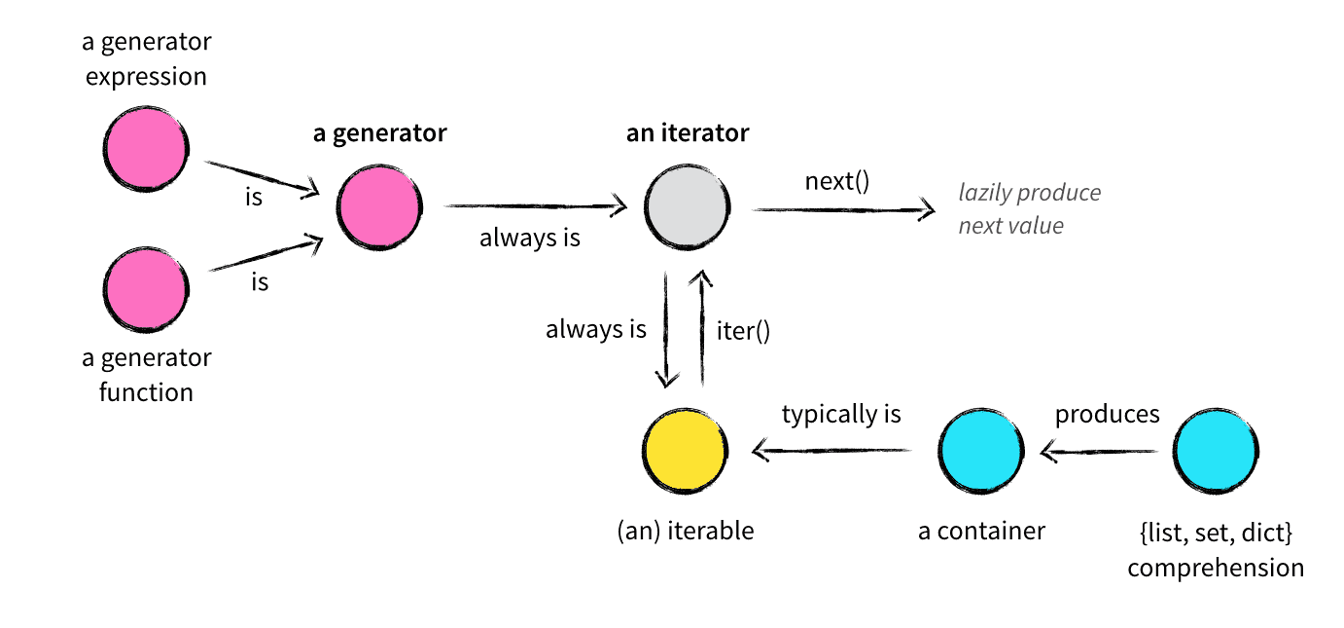

#### 生成器（generator）
依托循环结构与生成表达式**惰性**产生数据的对象
#### 迭代器（iterator）
Iterator对象表示的是一个数据流，Iterator对象可以被next()函数调用并不断返回下一个数据  
迭代器不但可以作用于for循环，还可以被next()函数不断调用并返回下一个值，直到最后抛出**StopIteration错误**表示无法继续返回下一个值。

In [68]:
x = [1, 2, 3] # a container
y = iter(x) # an iterator
print(next(y), next(y))

1 2


In [69]:
type(x)

list

In [70]:
type(y)

list_iterator

In [71]:
x = [1, 2, 3]
x1 = []
y = iter(x)
for i in y: # 本质是Lazy Request
    x1.append(i)
print(x1)

[1, 2, 3]


**迭代器的本质**：Protocol, client-server

### 1.for循环的工作原理
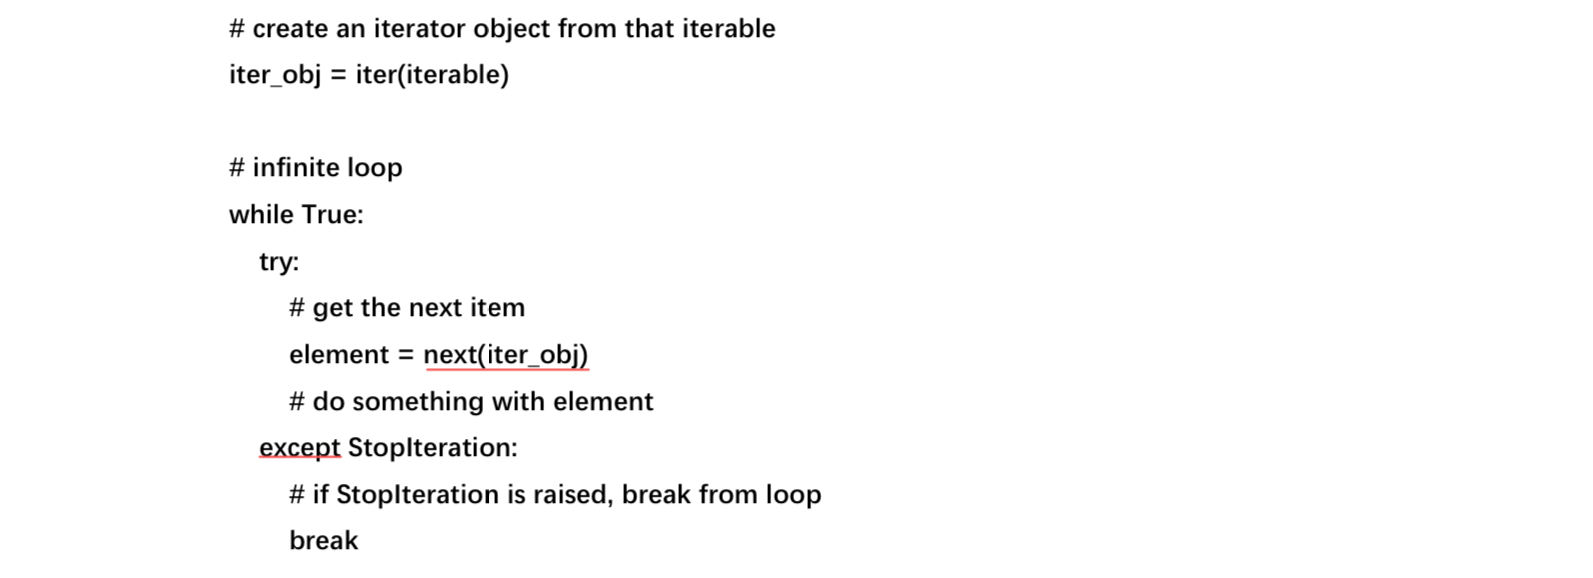

### 2.生成器表达式

In [72]:
a = '12345'
b = [int(i)**2 for i in a] # 列表生成式
b

[1, 4, 9, 16, 25]

In [73]:
c = (int(i)**2 for i in a) # 生成器表达式，不是tuple
c

<generator object <genexpr> at 0x106b018c0>

In [74]:
for i in c:
    print(i)

1
4
9
16
25


### 3.set集合
可迭代，内部元素**相异且无序**的可哈希对象

In [76]:
s1 = {1, 2, 3, 4, 5, 5, 1} # 花括号表示集合
s2 = set('abcaabbcc')
print(s1)
print(s2)

{1, 2, 3, 4, 5}
{'b', 'a', 'c'}


In [77]:
s1.add(7)
s1.remove(4)
s1

{1, 2, 3, 5, 7}

### 4.Dict(key-value)词典
**非顺序结构，无法切片**

In [79]:
d = {'Michael': 95, 'Bob': 75, 1: 85}
print('Michael = ', d['Michael']) # key做下标，直接存取；根据key的内容进行hash，因此key值不可变
d['Bob'] = 'fail' # key和value均可是任意类型
print('Bob = ', d['Bob'])
print(d[1])

Michael =  95
Bob =  fail
85


In [80]:
d['Xiao Li'] = '90'
print('Xiao Li' in d)

True


In [81]:
for k in d: # dict非顺序，如何实现？顺序取key，这里的'd'等效为d.key(),返回iterator
    print(k, d[k]) # case sensitive

Michael 95
Bob fail
1 85
Xiao Li 90


In [82]:
for val in d.values():
    print(val)

95
fail
85
90


In [83]:
for (key, val) in d.items():
    print(key, val)

Michael 95
Bob fail
1 85
Xiao Li 90


### 5.总结：容器类（container）,可迭代对象（iterable），迭代器（iterator），迭代操作（iter()）

#### 容器类：seq:list, string, set, tuple; dict
都内建有一个操作函数来返回一个iterator，iterator用于支持for循环和in操作，同时支持next接口
#### 类型转换

In [84]:
print(int(10.6))
print(set([1,2,3,3,2]))
print(list('hello'))
print(list({1:2, 'a':3})) # 返回key
print(dict([[1,2],[3,4]])) # 一种初始化词典的方法

10
{1, 2, 3}
['h', 'e', 'l', 'l', 'o']
[1, 'a']
{1: 2, 3: 4}


## 六、其他操作
### 1.加包-解包运算

In [85]:
a = 1, 2, 'ww', 3, 4 # 自动加包，tuple
a

(1, 2, 'ww', 3, 4)

In [86]:
*_, b = a # 自动解包
b

4

In [90]:
c, d, *_, f = [*[1, 2, 3], [4, 5, 6]]
c, d, f

(1, 2, [4, 5, 6])

### 2.列表生成式

In [91]:
b = [i for i in range(5)]
b *= 2 # 注意不是逐元素操作
b

[0, 1, 2, 3, 4, 0, 1, 2, 3, 4]

In [92]:
[x * x for x in range(1,11)]

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

In [93]:
[x * x for x in range(1,11) if x % 2 == 0]

[4, 16, 36, 64, 100]

In [94]:
[m + n for m in 'ABC' for n in 'XYZ'] # 分别生成字符串再相加

['AX', 'AY', 'AZ', 'BX', 'BY', 'BZ', 'CX', 'CY', 'CZ']

In [95]:
d = {'x': 'A', 'y': 'B', 'z': 'C'}
[k + '=' + v for k, v in d.items()]

['x=A', 'y=B', 'z=C']

In [96]:
matrix = [[1, 2, 7], [4, 9], [6, 5, 4, 3]]
flatten_matrix = [val
                 for sublist in matrix
                     for val in sublist]
flatten_matrix

[1, 2, 7, 4, 9, 6, 5, 4, 3]